In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos

/content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos


In [7]:
!ls

dados.xlsx	 DoritosD027.wav  DoritosD112.wav  DoritosD235.wav
DoritosD022.wav  DoritosD098.wav  DoritosD130.wav
DoritosD023.wav  DoritosD099.wav  DoritosD189.wav
DoritosD026.wav  DoritosD100.wav  DoritosD192.wav


In [61]:
# Replace 'file' with the actual path to your audio file
file = 'DoritosD023.wav'

#get the original sample rate
import librosa
srread = librosa.get_samplerate(file)
print(srread)

44100


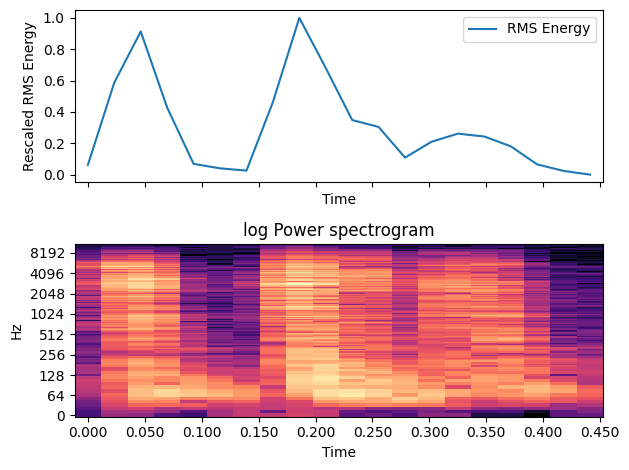

Average Power = (Area under RMS curve) / (Time Duration): 0.3147803203912676


In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

y, sr = librosa.load(file, sr=44100, duration=1.0)
time = np.arange(0, len(y)) / sr

# Ad. energia Sonora
# Compute the energy of each frame
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
#print(rms)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Rescale your array
rms_rescaled = scaler.fit_transform(rms.reshape(-1, 1)).flatten()
#print(rms_rescaled)

# Plot the rescaled RMS energy values
fig, ax = plt.subplots(nrows=2, sharex=True)

times = librosa.times_like(rms)
ax[0].plot(times, rms_rescaled, label='RMS Energy')
ax[0].set_yscale('linear')  # Set y-axis scale to linear
ax[0].set(ylabel='Rescaled RMS Energy')
ax[0].set_xlabel('Time')
ax[0].legend()

# Assuming 'S' is your spectrogram data
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

plt.tight_layout()
# Get the current working directory
original_directory = os.getcwd()
# Move up to the parent directory
os.chdir("..")
# Specify the filename for the figure
figure_filename = f'{file}.png'
# Save the figure in the parent directory
plt.savefig(figure_filename)
# Return to the original directory
os.chdir(original_directory)
# Show the plot
plt.show()

# Calculate the numerical integration of RMS values over time (trapezoidal rule)
integration_area = np.trapz(rms_rescaled, times)
energy_area = integration_area/np.max(times)
#print("Numerical Integration of RMS rescaled:", integration_result)
print("Average Power = (Area under RMS curve) / (Time Duration):", energy_area)